# Erkennung von Ziffern

Semesterarbeit 3

## EDS-Einführung in Data Science

Klasse: BSc INF-P-IN010, BE1, HS20/21<br>
Dozent: Dr. Tim vor der Brück<br>
Autor:  Michael Friderich<br>
Datum:  07.11.2020<br>

## Einleitung

Im heutigen Zeitalter werden die künstliche Intelligenz und das Machnine Learning immer wichtiger. Da eer Mensch nicht
in der Lage ist, die heutigen Datenflutten zu bewältigen, spielen Computer eine immer wichtigere Rolle in unserem Alltag.
Um künstliches Wissen aus Erfahrungen zu generieren, wird versucht das menschliche Gehirn nachzustellen.
Automatisch fahrende Autos, Text-, Bild-, Spracherkennung, Frühwarnsysteme, Optimierung um nur einige Beispiele zu nennen
bei welchen künstliche neuronale Netzte eingesetzt werden. In dieser Thesis wird ein neuronales Netzwerk erstellt,
trainiert und geprüft ob dies die persönliche Handschrift erkennen kann.

## Neuronales Netz

Wie der Name besagt, versteht man unter einem neuronalen Netzwerk eine beliebige Anzahl miteinander verbundener Neuronen.
Dieser Begriff stammt aus den Neurowissenschaften und bezieht sich auf das menschliche Gehirn. In der Informatik wird
versucht dessen Strukturen, als künstliches neuronales Netz zu modellieren. Dabei wird künstliches Wissen aus Erfahrung
generiert. Das System lernt aus Beispielen und verallgemeinert diese nach Abschluss der Lernphase. Um möglichst Gute
Ergebnisse zu erzielen sind auch möglichst Grosse Datenmengen erforderlich. <br>

In [1]:
from IPython.display import HTML
from IPython.core.display import display

display(HTML('<img src="images/neuronal_network.png" width="600px" style="margin: auto" />'))

###### Abbildung 1 - Neuronales Netzwerk

In einem neuronalen Netz werden Daten in die Input-Nodes geben und nach Berechnung an den Output-Nodes ausgegeben. Dabei
sind die Daten abhängig vom zu lösenden Problem. Das Netz verfügt über einen oder mehrere Hidden-Layers. Diese bilden
die Masse des künstlichen Gehirns und wirken auf die Ausgabe an den Output-Nodes.

## Schriterkennung

Einer der ersten Anwendungen für die Schritenerkennung wurde für die Post entwickelt. Um die Postsortierung zu
automatisieren, wollte man die Postleizahlen erkennen können. Das neuronale Netzwerk wird dabei durch eine Vielzahl an
Bildern trainiert, damit die verschiedenen Handschriten zuverlässig erkennt werden. <br>
In diesem Beispiel werden wir ein Neuronales Netzwerk erstellen, dieses trainieren und aneschliessend mit der eigenen
Hanschrift überprüfen. Die Trainingsdaten stammen dabei aus dem MINST-Datenbank welche 60'000 [2] Beispiele enthält.

In [6]:
! pip install opencv

import cv2 as cv                # need to import own images
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf         # need to create the neuronal Network

Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement opencv
ERROR: No matching distribution found for opencv


### Daten

Die MINST-Datenbank enthält gelabelte Daten, welche wir für das überwachte Lernen benötigen. Dabei stehen uns 60'000 [2]
Bilder mit Ziffern zwischen 0 und 9 zur Verfügung. Mit den erhaltenen Daten bilden wir einen zufälligen Trainings- sowie
einen Testdatensatz. Als Nächstes normalisieren wir die Bildpunkte der erhaltenen Bilderdaten zwischen 0 und 1.

In [7]:
# load the mnist data and split into train and test
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

### Neuronales Netz erstellen

Nun erstellen wir das neuronale Netzwerk mit 256 Hidden-Units. Zudem legen wir die Grösse der eigenen Ziffernbilder auf
28*28 Pixel fest.

In [8]:
# define the model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))    # Input size of the images
model.add(tf.keras.layers.Dense(units=256, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=256, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=10, activation=tf.nn.softmax))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Neuronales Netz trainieren

Nachdem das neuronale Netz erstellt wurde, trainieren wir dieses mit den Daten aus der MNIST-Datenbank. Dabei sehen wir
das sich die Genauigkeit mit jedem Durchlauf verbessern. Unser neuronales Netz weisst ungefähr eine Genauigkeit von 97%
auf, was für unser Netz ein akzeptabler Wert ist. Durch den "epochs" Wert kann festegelgt werden wie oft der Datensatz
durchlaufen werden soll.

In [9]:
# train the neuronal network
model.fit(x_train, y_train, epochs=10)

loss, accuracy = model.evaluate(x_test, y_test)
print(accuracy * 100)
print(loss)

model.save('digits.model')

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3946 - accuracy: 0.8888  

### Neuronales Netz prüfen

Nun da wir unser neuronales Netz trainiert haben, wollen wir dieses durch eigene Bilder überprüfen. Diese werden
in schwarz/weiss Bilder umgewandelt, um einen möglichst hohen Kontrast zu erhalten. Anschliessend werden diese
dem trainierten neuralen Netz übergeben und wir erhalten eine Antwort mit der vermuteten Lösung.

The result is probably: 3
The result is probably: 2
The result is probably: 8
The result is probably: 8
The result is probably: 5


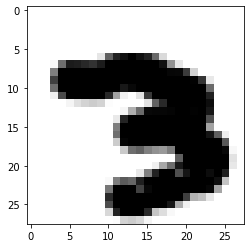

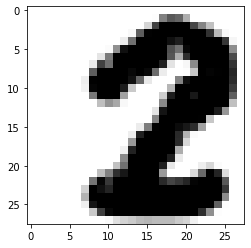

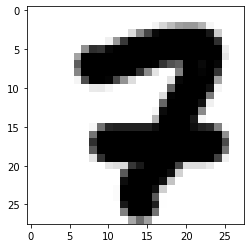

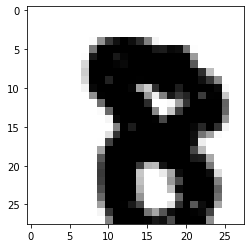

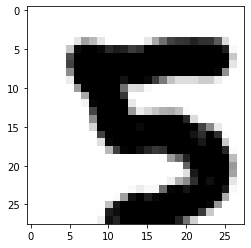

In [13]:
for x in range(1, 6):
    img = cv.imread(f'{x}.png')[:, :, 0]
    img = np.invert(np.array([img]))
    prediction = model.predict(img)
    print(f'The result is probably: {np.argmax(prediction)}')
    plt.imshow(img[0], cmap=plt.cm.binary)
    plt.show()

## Findings

Wir sehen das 3 von 5 Zahlen richtig angegeben wurden. Dies Unregelmässigkeit kann verschiedene Ursachen haben. So treten
sicher bei der Synthese der Datenbilder Unregelmässigkeiten auf. Mögliche Diskrepanzen können der Scanner, Kontrastwert,
die Ausschnittsgrösse und die Position der Ziffer sein. Eine weiter Möglichkeit könnte sein, die persönliche Handschrift
bereits in die Trainingsdaten einfliessen zu lassen. Ausserdem könnte das Verändern der Hidden-Layouts Verbesserungen
bei der Erkennung bewirken. Eine weitere Ursache kann der Zufall sein. <br>
In meinem Beispiel konnte ich nach Anpassen das "epochs" Wert auf 20, bereits 4 von 5 Zahlen erkennen. Was darauf hindeutet
das mit genügend Training, die Genauigkeit zunimmt und eventuell alle Ziffern erkennt werden.


---
## Quellenverzeichnis

### Abbildungsverzeichnis

[1] Abbilidung 1: Russell, Matthew A. / Mikhail Klassen (2019): Mining the Social Web: Data Mining Facebook, Twitter, LinkedIn, Instagram,
GitHub, and More, 3. Aufl., Sebastopol, USA, California: O’Reilly Media. s. 98

### Literaturverzeichnis

[1] Russell, Matthew A. / Mikhail Klassen (2019): Mining the Social Web: Data Mining Facebook, Twitter, LinkedIn, Instagram,
GitHub, and More, 3. Aufl., Sebastopol, USA, California: O’Reilly Media.

[2] Wikipedia, https://de.wikipedia.org/wiki/MNIST-Datenbank, Abgerufen am 07.11.2020
